In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Preprocesamieto de los datos

# Consigna 1
Leer los datos del archivo tabla nutricional.csv. Completar las
celdas faltantes con ceros. Poner todos los datos en la misma unidad.



In [2]:
#importación de datos
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

#remplazo de valores nulos por 0
tabla_nutricional.fillna(0, inplace=True)

#alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
#tabla_nutricional = tabla_nutricional.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
#tabla_nutricional = tabla_nutricional.mul(100 / tabla_nutricional['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
#tabla_nutricional['Alimento'] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000  #divido por mil las columnas con mg para obtener gr
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols = tabla_nutricional.columns # Na (mg);Ca (mg);Fe (mg);
cols_to_drop = [col for col in cols if 'mg' in col] #elimino las columnas con mg
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional_clean = tabla_nutricional
tabla_nutricional.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.0,1.62,0.77,0.060,0.0,0.04444,0.09900,0.000060
2,Yogurt,19.00,2.45,0.51,0.49,0.0,0.32,0.14,0.014,0.0,0.00799,0.01767,0.000005
3,Queso crema,1.66,0.06,0.10,0.37,0.0,0.36,0.11,0.010,0.0,0.00123,0.00093,0.000000
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.0,0.76,0.21,0.020,0.0,0.02084,0.01654,0.000000


# testeo

In [10]:
#imprimir la cantidad de gramos de comida
#print(tabla_nutricional['Cantidad (gr/ml)'])
#ahora la suma total
#print(tabla_nutricional['Cantidad (gr/ml)'].sum())
print(tabla_nutricional.shape)
print(tabla_nutricional.sum(axis=0))


(57, 13)
Alimento                Leche fluida enteraLeche entera en polvoYogurt...
Cantidad (gr/ml)                                                  1897.97
HC (gr)                                                           410.235
Proteinas (gr)                                                    112.413
Grasas (gr)                                                        76.911
Azucares Libres (gr)                                                56.75
AGS (gr)                                                           26.182
AGNI (gr)                                                          27.468
AG p (gr)                                                          28.087
Fibra (gr)                                                          21.26
Na (gr)                                                          3.337714
Ca (gr)                                                           0.71888
Fe (gr)                                                          0.023538
dtype: object


# Consigna 2
Desarrollar una funci´on que reciba como par´ametro un DataFrame y que eval´ue si las cantidades de los principales elementos de la dieta, prote´ınas, carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los m´argenes
de ingesta de la OMS. Esta funci´on debe devolver VERDADERO si los cumple.
Verificar la Canasta B´asica con esta funci´on.

**TODO: Preguntar si efectivamente la función tiene que dar true, y las condiciones uno a uno también.**

**Sodio tiene que dar igual? Más de 200? 10% de tolerancia?**

- Es por día??????
- Cómo sería los gr/ml?

In [13]:
"""
Recibe como parámetro un DataFrame y evalúa si las cantidades de los principales elementos de la dieta, 
proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras, 
cumple los márgenes de ingesta de la OMS:
"""
condiciones = """
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia
"""
print("Condiciones OMS:", condiciones)
def oms_check (df:pd.DataFrame):

    #establecemos los parámetros de referencia para los cálculos
    kcal = 2700
    proteina_kcalgr = 4
    hc_kcalgr = 4
    grasas_kcalgr = 9

    #listamos manualmente las frutas y verduras de la lista de alimentos
    lista_fru_y_ver = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 'Batata']
    #filtramos las frutas y verduras, seleccionamos la columna de cantidad en gr y sumamos
    fru_y_ver = df[df['Alimento'].isin(lista_fru_y_ver)]['Cantidad (gr/ml)'].sum()

    #sumamos cada columna de nutriente y la guardamos en un array (sin la de alimentos)
    df = df.drop('Alimento', axis='columns')
    nutrientes_totales = df.sum().to_numpy()
    
    #*Ahora accedemos al valor sumado en cada columna para hacer los cálculos*

    #lista de columnas
    cols = df.columns
    #buscamos el indice de cada columna en el dataframe
    proteinas_index = cols.get_loc('Proteinas (gr)')
    hc_index = cols.get_loc('HC (gr)')
    grasas_index = cols.get_loc('Grasas (gr)')
    sodio_index = cols.get_loc('Na (gr)')
    fibra_index = cols.get_loc('Fibra (gr)')
    cantidad_index = cols.get_loc('Cantidad (gr/ml)')

    #guardamos los datos de nutrientes usando el indice obtenido
    cantidad = nutrientes_totales[cantidad_index]
    #guardamos directamente los porcentajes de calorías sobre el total de calorías (lo que estamos buscando)
    proteinas = nutrientes_totales[proteinas_index]*proteina_kcalgr*100/kcal
    hc = nutrientes_totales[hc_index]*hc_kcalgr*100/kcal
    grasas = nutrientes_totales[grasas_index]*grasas_kcalgr*100/kcal
    sodio = nutrientes_totales[sodio_index]
    fibra = nutrientes_totales[fibra_index]

    #generate a dictionary with the results
    results = {'Proteinas': proteinas, 
               'HC': hc, 'Grasas': grasas, 
               'Sodio': sodio, 'Fibra': fibra, 
               'Frutas y Verduras': fru_y_ver}
    
    #imprimimos los resutados de manera informativa

    print('Cantidad total de alimentos (g):', cantidad)
    
    # for 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 190 < sodio < 210 and fibra > 25000 and fru_y_ver >= 400000 print an array of trues and false
    gramos = [nutrientes_totales[proteinas_index], nutrientes_totales[hc_index], nutrientes_totales[grasas_index], nutrientes_totales[sodio_index], nutrientes_totales[fibra_index], fru_y_ver]
    check = [10 < proteinas < 15, 55 < hc < 75, 15 < grasas < 30, 0.19 < sodio < 0.21, fibra > 25, fru_y_ver >= 400]
    i = 0
    print('---')
    for key, value in results.items():
        print(key, value)
        print('Cantidad (g):', gramos[i])
        print('Resultado:', check[i])
        i += 1
        print('---')

    #finalizamos chequeando que las condiciones dadas de la OMS se cumplan efectivamente (para los 200mg de sodio damos un 10% de tolerancia ya que es difícil que nos de exactamente ese valor)
    return 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 0.19 < sodio < 0.21 and fibra > 25 and fru_y_ver >= 400


oms_check(tabla_nutricional)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de alimentos (g): 1897.97
---
Proteinas 16.653777777777773
Cantidad (g): 112.41299999999998
Resultado: False
---
HC 60.775555555555556
Cantidad (g): 410.235
Resultado: True
---
Grasas 25.637000000000004
Cantidad (g): 76.911
Resultado: True
---
Sodio 3.337714
Cantidad (g): 3.337714
Resultado: False
---
Fibra 21.26
Cantidad (g): 21.26
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

### Análisis en Componentes Principales

# Consigna 3
Realizar un An´alisis en Componentes Principales (ACP), tomando
el valor nutricional de cada alimento por gramo. Graficar cada alimento como un
punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gr´afico, analizar los clusteres que quedan planteados por
la proyecci´on.

### Observación
Acá copiamos la función del Labo 7 e hicimos algunas modificaciones a la tabla nutricional para que funcione correctamente.
En el labo, cada columna era un ejemplo (imagen) y cada fila representaba los valores para una variable en específico.


In [95]:

alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
alimentos_arr = alimentos.to_numpy()
#sacamos los alimentos para tener sólo números
tabla_nutricional_matriz = tabla_nutricional.copy()
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
#dividimos por la media para que los valores sean comparables
tabla_nutricional_matriz = tabla_nutricional_matriz.mul(1 / tabla_nutricional_matriz['Cantidad (gr/ml)'], axis=0)
#quitamos la columna de cantidad para que no afecte al cálculo
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Cantidad (gr/ml)', axis='columns')
#print(tabla_nutricional_matriz)
#convertimos a numpy para obtener una matriz 
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
#transponemos la tabla para que las columnas sean los alimentos
tabla_nutricional_matriz = tabla_nutricional_matriz.T 

def calculoACP(data):
    d, n = data.shape # d, 1444 es la dimensión de los datos, n, 380 es la cantidad de datos
    m=np.mean(data, axis=1) #calculamos la media de los datos por columnas, para cada dimensión (x1, ... xd)
    # np.tile repite la media m, n veces, para que tenga la misma dimensión que data
    # luego la restamos a data para centrar los datos
    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    # calculamos la matriz de covarianza, que es X*X^T/n
    Mcov = np.dot(X,X.T) / n # Covariance Matrix
    #avals y avects
    D, V = np.linalg.eigh(Mcov)

    # ordenamos los autovalores de mayor a menor, y reordenamos los autovectores de acuerdo a los autovalores
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

D, V, X, m = calculoACP(tabla_nutricional_matriz)



En esta celda testeamos la cantidad de componentes necesarios para representar ciertos porcentajes de información correctamente.

Cantidad de autovectores de representación al 95 %:  3


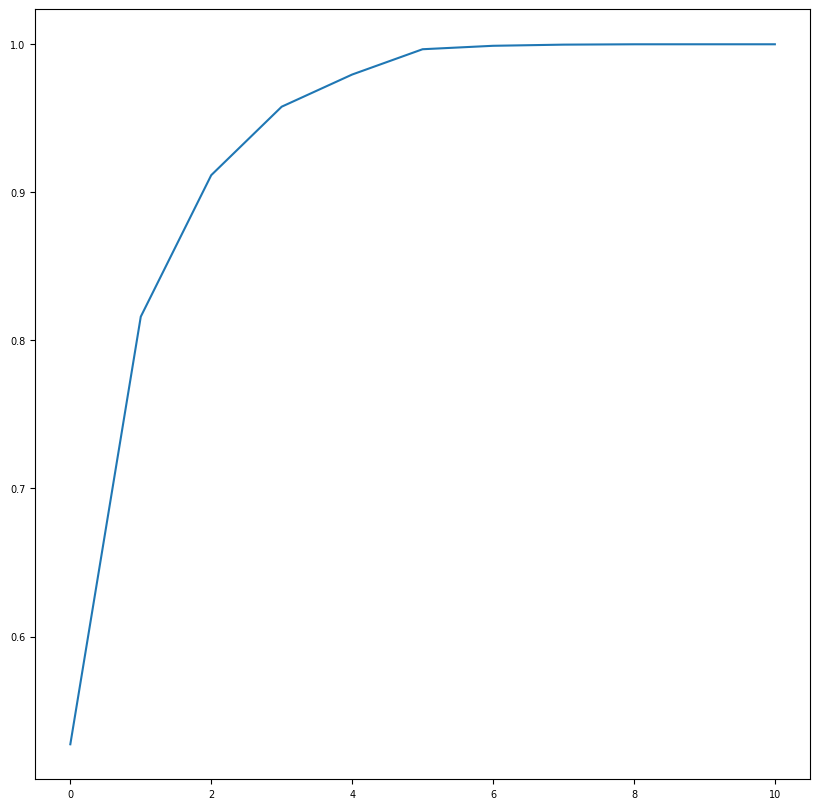

In [96]:
ratio = np.cumsum(D) / np.sum(D)
plt.plot(ratio)
plt.plot(np.cumsum(D[100:])/ np.sum(D))
x = np.where(ratio > 0.95)[0]
M = x[0]

print('Cantidad de autovectores de representación al 95 %: ', M)

## Análisis de clusteres

Cantidad de datos:  57 Cantidad de dimensiones:  11 Cantidad de autovectores de representación al 95 %:  3


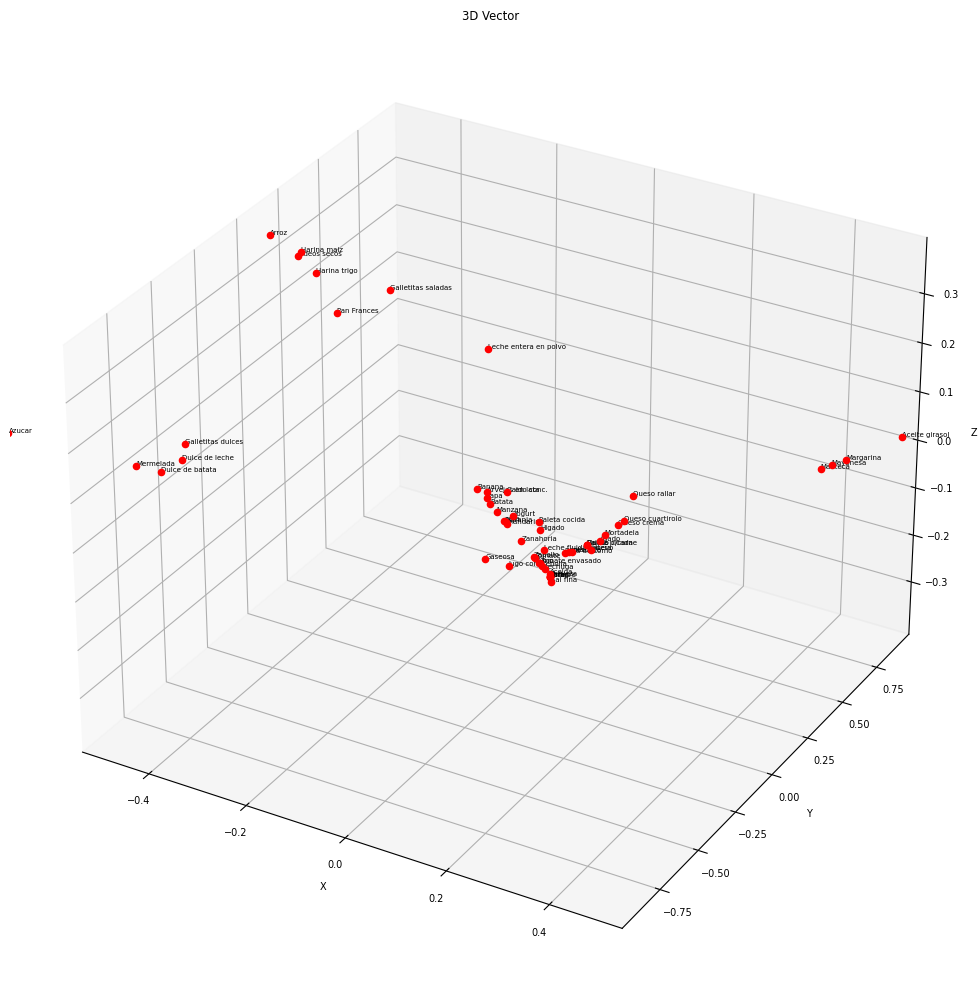

In [98]:
#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length, 'Cantidad de autovectores de representación al 95 %: ', M)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=5, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])

# Show the plot
plt.tight_layout()
plt.show()

En este primer gráfico, se pueden observar claramente 4 grupos de alimentos:

A la izquierda, tenemos todos dulces. Casualmente, son todos sólidos. Acá están todos los alimentos con altos niveles de azucar, salvo los líquidos que pueden tener otras características. Al parecer en el análisis de componentes remarca esa diferencia notablemente, dejando a los líquidos dulces en otro grupo.

A la derecha, claramente tenemos los alimentos con el más alto contenido en grasa: manteca, margarina, aceite y mayonesa. El ACP hace un gran trabajo en distinguirlos del resto.

Arriba, tenemos los alimentos con alto nivel de hidrocarburos, casi todos alimentos con la harina como ingrediente principal. La leche en polvo entra en este grupo aunque más centrado respecto a los demás.

Por último, en el centro, tenemos al grupo más grande, que analizaremos con más profundidad en la siguiente celda. 

Procedemos a ajustar los límites en cada eje para ver más claramente el último cluster:

Cantidad de datos:  57 Cantidad de dimensiones:  11


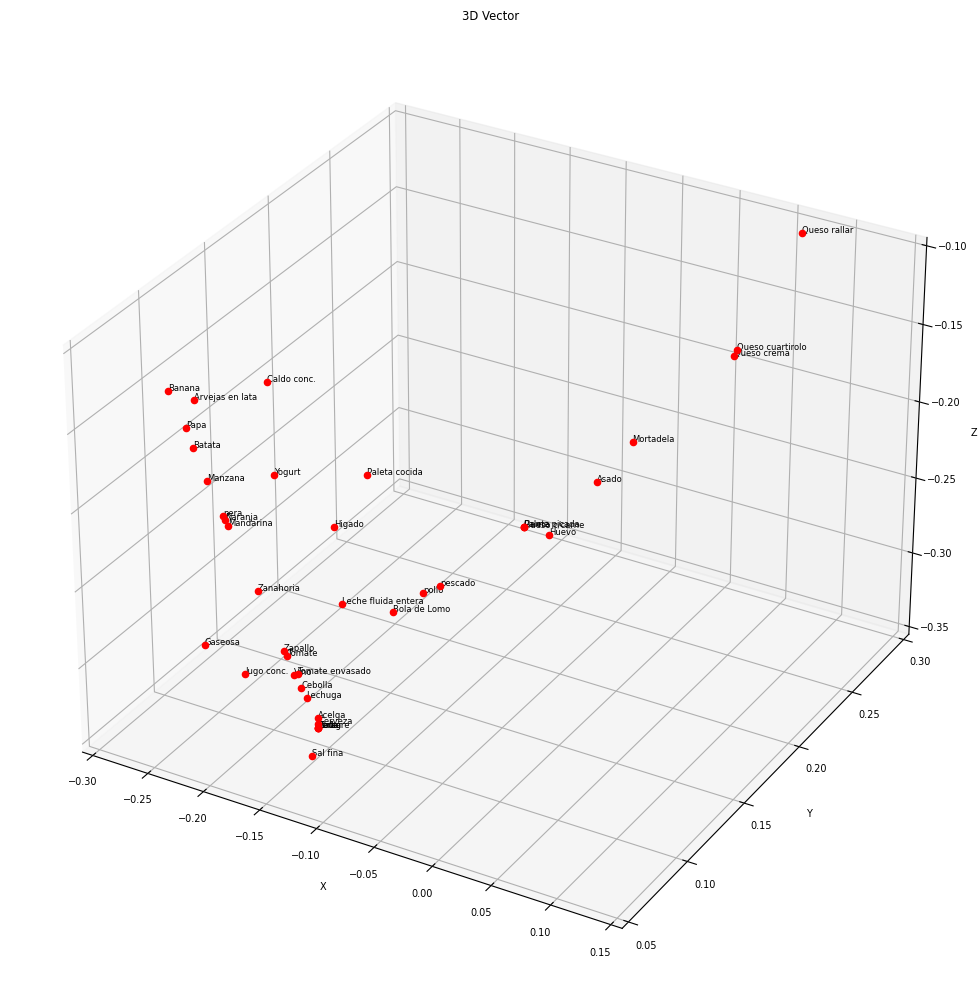

In [126]:
#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=6, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-0.3, 0.15])
ax.set_ylim([0.05, 0.3])
ax.set_zlim([-0.35, -0.1])

# Show the plot
plt.tight_layout()
plt.show()

Como primer observación, debemos notar que no es casual que todos los alimentos de este grupo sean mucho menos 'procesados' sus características nutricionales al tener menos alteraciones en la producción, están más equilibradas, es decir, no tienen una variable superlativa que los distingue del resto de los alimentos como en los otros casos. Los alimentos equilibrados son necesarios para tener una dieta equilibrada, y por lo tanto más saludable.

Es llamativa la inclusión de la gaseosa y el jugo concentrado en este grupo ya que no cumplen con las características mencionadas.

Dentro de este grupo podemos observar diferentes 'ramas' que no están diferenciadas todas por igual, pero se puede ver un orden en la posición en ciertas direcciones.

Observamos una línea recta desde la banana, hacia el pequeño grupo de la acelga. Sobre esta se encuentran absolutamente todas las frutas y verduras. Otro gran acierto del ACP.

Se puede ver otra línea recta desde la bola de lomo hacia el queso de rallar. Esta está divida en dos, subgrupos de la misma categoría, carnes y quesos. Arriba tenemos los 3 quesos que tiene la tabla. Entre la carne y los quesos tenemos la mortadela, un fiambre, lo que tiene sentido ya que es una carne con un nivel de sodio más alto. Luego tenemos todas las carnes y el huevo (similar nutricionalmente).

Por fuera de estas rectas tenemos algunos alimentos que no están en una categoría tan clara como los anteriores pero en posiciones intermedias lógicamente.

# Aumentos de Precios

# Consigna 4
Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

In [127]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
consumidores_libres.fillna(0, inplace=True)
consumidores_libres.head()

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0


### Proyección de los alimentos de la nueva tabla en el mismo espacio de generadores que usamos antes:

Cantidad de datos:  19 Cantidad de dimensiones:  11 Cantidad de autovectores de representación al 95 %:  3


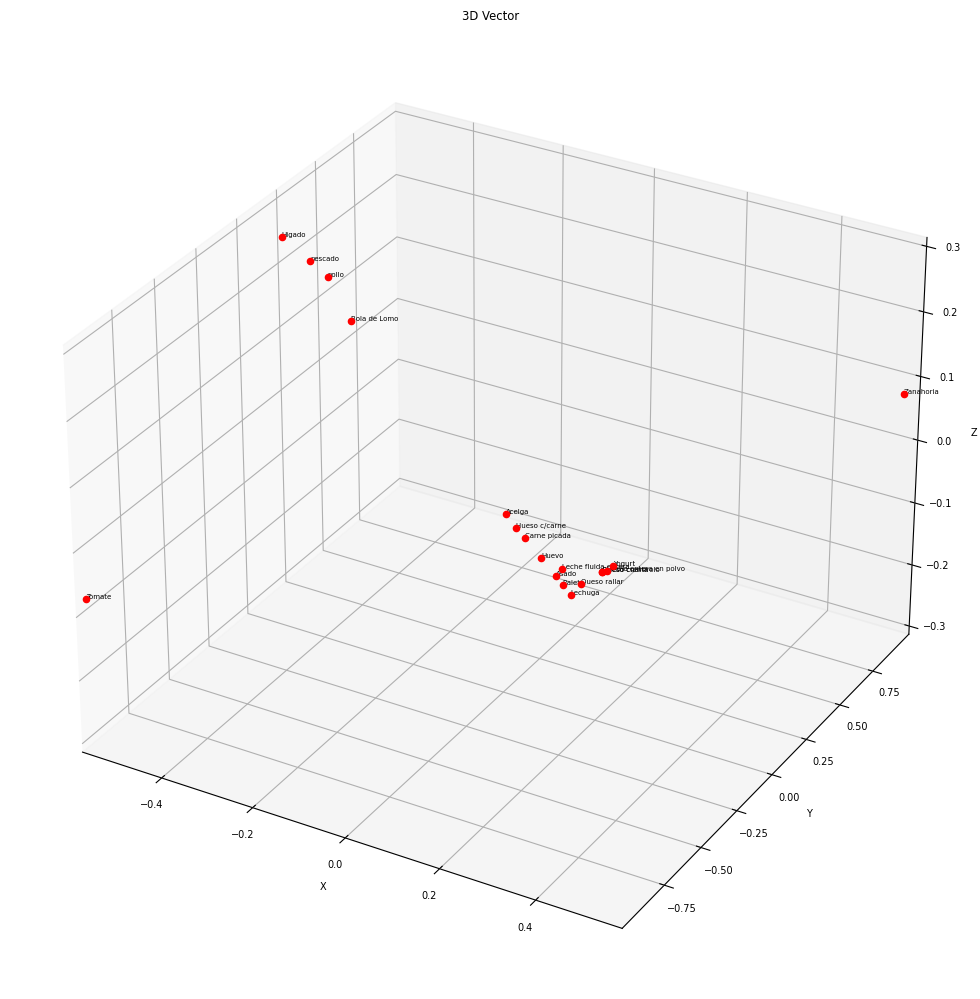

In [133]:


#escribo a mano los productos de la canasta básica (como están escritos ahí) que están en la tabla nutricional
productos = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
no_estan = ['BERENJENAS', 'ACELGA PAQUETE']

#nueva tabla
tabla_nutricional_matriz = tabla_nutricional.copy()
#filtro los productos que no están en la tabla nutricional
tabla_nutricional_matriz = tabla_nutricional_matriz[tabla_nutricional_matriz['Alimento'].isin(productos)]
#saco los alimentos para tener sólo números
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
#dividimos por la media para que los valores sean comparables
tabla_nutricional_matriz = tabla_nutricional_matriz.mul(1 / tabla_nutricional_matriz['Cantidad (gr/ml)'], axis=0)
#quitamos la columna de cantidad para que no afecte al cálculo
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Cantidad (gr/ml)', axis='columns')
#print(tabla_nutricional_matriz)
#convertimos a numpy para obtener una matriz 
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
#transponemos la tabla para que las columnas sean los alimentos como necesitamos
tabla_nutricional_matriz = tabla_nutricional_matriz.T 
#calculamos el nuevo ACP
D, V, X, m = calculoACP(tabla_nutricional_matriz)

#*Repetimos el proceso anterior:

#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length, 'Cantidad de autovectores de representación al 95 %: ', M)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=5, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])
#ax.set_xlim([-max(proyecciones[:, 0])-1, max(proyecciones[:, 0])+1])
#ax.set_ylim([-max(proyecciones[:, 1])-1, max(proyecciones[:, 1])+1])
#ax.set_zlim([-max(proyecciones[:, 2])-1, max(proyecciones[:, 2])+1])

# Show the plot
plt.tight_layout()
plt.show()

# Mínimos Cuadrados

In [ ]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')

consumidores_libres.head()

#productos_consumidores = tabla_nutricional[tabla_nutricional['Alimento'].isin(productos)]
#sacamos los alimentos para tener sólo números y convertimos a numpy para obtener una matriz, luego trasponemos para tener los valores en columnas
#productos_consumidores_matriz = productos_consumidores.drop('Alimento', axis='columns').to_numpy().T

#acá en base a los productos de la tabla de aumentos, 
# busco en qué indice de la tabla nutricional se encuentran
producto_indices = []
for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")
#producto_indices es un array que linkea los productos de la canasta básica con la tabla nutricional
# la posición en producto_indices es la misma que en la tabla de aumentos, 
# el valor, es el índice en la tabla nutricional
print(producto_indices)

#elimino los productos que no están en la tabla nutricional de la tabla de aumentos
#consumidores_libres = consumidores_libres.drop(no_estan, axis=1)
consumidores_libres = consumidores_libres.drop(consumidores_libres[consumidores_libres['PRODUCTOS'].isin(no_estan)].index)
#agrego una columna con el índice de la tabla nutricional
consumidores_libres['indice'] = producto_indices
consumidores_libres.head()



[33, 27, 44, 30, 28, 6, 26, 0, 56, 16, 17, 19, 31, 22, 21, 11, 7, 8, 10]


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,indice
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,33
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,27
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,44
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,30
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,28


In [ ]:
alimentos = consumidores_libres[['PRODUCTOS', 'indice']] #guardo los alimentos
consumidores_libres = consumidores_libres.drop('PRODUCTOS', axis='columns').drop('indice', axis='columns') #saco los alimentos para tener sólo números
consumidores_libres = consumidores_libres.mul(100 / consumidores_libres['Cantidad'], axis=0) #obtengo todas las filas a 100 gr
consumidores_libres[['PRODUCTOS', 'indice']] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
consumidores_libres.head()

#lo mismo con la tabla nutricional

#elimino los que no están en los aumentos de la tabla nutricional
print(tabla_nutricional.shape)
tabla_nutricional = tabla_nutricional.drop(tabla_nutricional[~tabla_nutricional['Alimento'].isin(productos)].index)
print(tabla_nutricional.shape)

#primero paso el aceite (92g por cada 100ml) a gramos (la leche es equivalente a 1g/ml)
tabla_nutricional.loc[tabla_nutricional['Alimento'] == 'Aceite girasol', 'Cantidad (gr/ml)'] = tabla_nutricional.loc[tabla_nutricional['Alimento'] == 'Aceite girasol', 'Cantidad (gr/ml)']*0.92


alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
tabla_nutricional = tabla_nutricional.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
tabla_nutricional = tabla_nutricional.mul(100 / tabla_nutricional['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
tabla_nutricional['Alimento'] = alimentos # agrego alimentos devuelta
tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns if col != 'Alimento']] #reordeno
tabla_nutricional.head()


(57, 13)
(19, 13)


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,100.0,4.6,3.1,2.9000,0.0,1.848148,0.811111,0.192593,0.0,0.057,0.105,0.000070
6,Huevo,100.0,0.0,12.0,11.8125,0.0,3.187500,4.500000,2.875000,0.0,0.135,0.056,0.002500
7,Asado,100.0,0.0,18.6,15.0000,0.0,5.860000,6.540000,0.378000,0.0,0.066,0.015,0.002240
8,Paleta,100.0,0.0,20.0,10.0000,0.0,5.866667,6.533333,0.373333,0.0,0.066,0.012,0.002267
10,Carne picada,100.0,0.0,20.0,10.0000,0.0,5.851852,6.555556,0.370370,0.0,0.066,0.012,0.002222


In [ ]:
#repito el linkeo por indice
productos = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
producto_indices = []
for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")

print(len(producto_indices))

#ahora puedo unir ambas tablas por el índice
for i in range(len(producto_indices)):
    
    for row in consumidores_libres.iterrows():
        if row[1]['indice'] == producto_indices[i]:
            tabla_nutricional.at[i, '31/12/2023'] = row[1]['31/12/2023']
            tabla_nutricional.at[i, '31/1/2024'] = row[1]['31/1/2024']
            tabla_nutricional.at[i, '29/2/2024'] = row[1]['29/2/2024']
            tabla_nutricional.at[i, '31/3/2024'] = row[1]['31/3/2024']
            tabla_nutricional.at[i, '30/4/2024'] = row[1]['30/4/2024']
            
            break

tabla_nutricional.head()

19


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,100.0,4.6,3.1,2.9000,0.0,1.848148,0.811111,0.192593,0.0,0.057,0.105,0.000070,166.666667,206.666667,230.0,240.0,246.666667
6,Huevo,100.0,0.0,12.0,11.8125,0.0,3.187500,4.500000,2.875000,0.0,0.135,0.056,0.002500,165.000000,210.000000,220.0,230.0,230.000000
7,Asado,100.0,0.0,18.6,15.0000,0.0,5.860000,6.540000,0.378000,0.0,0.066,0.015,0.002240,110.000000,121.000000,162.0,189.0,199.000000
8,Paleta,100.0,0.0,20.0,10.0000,0.0,5.866667,6.533333,0.373333,0.0,0.066,0.012,0.002267,280.000000,370.000000,460.0,495.0,550.000000
10,Carne picada,100.0,0.0,20.0,10.0000,0.0,5.851852,6.555556,0.370370,0.0,0.066,0.012,0.002222,120.000000,110.000000,120.0,230.0,270.000000


In [ ]:
#sumo todas las columnas de la tabla nutricional y me quedo con una fila

tabla_nutricional_sum = tabla_nutricional.sum(axis=0).mul(1/19)
print(tabla_nutricional_sum)

#ahora calculo el precio de cada nutriente por gramo
tabla_nutricional['Proteina 31/12/2023'] = tabla_nutricional['Proteinas (gr)']*tabla_nutricional['31/12/2023']/100
tabla_nutricional['HC 31/12/2023'] = tabla_nutricional['HC (gr)']*tabla_nutricional['31/12/2023']/100
tabla_nutricional['Grasas 31/12/2023'] = tabla_nutricional['Grasas (gr)']*tabla_nutricional['31/12/2023']/100
tabla_nutricional['Proteina 31/1/2024'] = tabla_nutricional['Proteinas (gr)']*tabla_nutricional['31/1/2024']/100
tabla_nutricional['HC 31/1/2024'] = tabla_nutricional['HC (gr)']*tabla_nutricional['31/1/2024']/100
tabla_nutricional['Grasas 31/1/2024'] = tabla_nutricional['Grasas (gr)']*tabla_nutricional['31/1/2024']/100
tabla_nutricional['Proteina 29/2/2024'] = tabla_nutricional['Proteinas (gr)']*tabla_nutricional['29/2/2024']/100
tabla_nutricional['HC 29/2/2024'] = tabla_nutricional['HC (gr)']*tabla_nutricional['29/2/2024']/100
tabla_nutricional['Grasas 29/2/2024'] = tabla_nutricional['Grasas (gr)']*tabla_nutricional['29/2/2024']/100
tabla_nutricional['Proteina 31/3/2024'] = tabla_nutricional['Proteinas (gr)']*tabla_nutricional['31/3/2024']/100
tabla_nutricional['HC 31/3/2024'] = tabla_nutricional['HC (gr)']*tabla_nutricional['31/3/2024']/100
tabla_nutricional['Grasas 31/3/2024'] = tabla_nutricional['Grasas (gr)']*tabla_nutricional['31/3/2024']/100
tabla_nutricional['Proteina 30/4/2024'] = tabla_nutricional['Proteinas (gr)']*tabla_nutricional['30/4/2024']/100
tabla_nutricional['HC 30/4/2024'] = tabla_nutricional['HC (gr)']*tabla_nutricional['30/4/2024']/100
tabla_nutricional['Grasas 30/4/2024'] = tabla_nutricional['Grasas (gr)']*tabla_nutricional['30/4/2024']/100
#ahora el aumento porcentual por cada nutriente
tabla_nutricional['Proteina %'] = (tabla_nutricional['Proteina 30/4/2024'] - tabla_nutricional['Proteina 31/12/2023'])/tabla_nutricional['Proteina 30/4/2024']*100
tabla_nutricional['HC %'] = (tabla_nutricional['HC 30/4/2024'] - tabla_nutricional['HC 31/12/2023'])/tabla_nutricional['HC 30/4/2024']*100
tabla_nutricional['Grasas %'] = (tabla_nutricional['Grasas 30/4/2024'] - tabla_nutricional['Grasas 31/12/2023'])/tabla_nutricional['Grasas 30/4/2024']*100

#calculo el promedio de cada columna
tabla_nutricional_sum = tabla_nutricional.sum(axis=0).mul(1/19)
print(tabla_nutricional_sum)

Cantidad (gr/ml)        100.000000
HC (gr)                  23.389290
Proteinas (gr)            7.458675
Grasas (gr)               8.635802
Azucares Libres (gr)      5.263158
AGS (gr)                  2.156576
AGNI (gr)                 2.991618
AG p (gr)                 3.864370
Fibra (gr)                1.127485
Na (gr)                   0.036789
Ca (gr)                   0.020105
Fe (gr)                   0.001422
31/12/2023              238.169591
31/1/2024               283.146199
29/2/2024               326.456140
31/3/2024               348.959064
30/4/2024               370.286550
dtype: float64
Cantidad (gr/ml)        100.000000
HC (gr)                  23.389290
Proteinas (gr)            7.458675
Grasas (gr)               8.635802
Azucares Libres (gr)      5.263158
AGS (gr)                  2.156576
AGNI (gr)                 2.991618
AG p (gr)                 3.864370
Fibra (gr)                1.127485
Na (gr)                   0.036789
Ca (gr)                   0.020105
Fe (g

/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91158/299461094.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabla_nutricional_sum = tabla_nutricional.sum(axis=0).mul(1/19)
/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91158/299461094.py:28: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabla_nutricional_sum = tabla_nutricional.sum(axis=0).mul(1/19)


# Consigna 5
Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.


Tomamos los alimentos que están en ambas tablas.

In [ ]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# paso todos los aliments de ambos archivos a minisculas para ver los alimentos en comun
tabla_nutricional['Alimento'] = tabla_nutricional['Alimento'].str.lower()
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# busco los alimentos en comun
alimentos_comunes = set(tabla_nutricional['Alimento']).intersection(set(consumidores['PRODUCTOS']))

print("Alimentos comunes encontrados en ambos archivos:")
for alimento in alimentos_comunes:
    print(alimento)


Alimentos comunes encontrados en ambos archivos:
asado
cebolla
manzana
naranja
bola de lomo


In [ ]:
alimentos_tabla_nutrucional=['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
alimentos_consumidores_libres_en_minisculas = ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana','asado', 'paleta', 'carne picada comun','yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol','arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco','leche c/vit.fort']


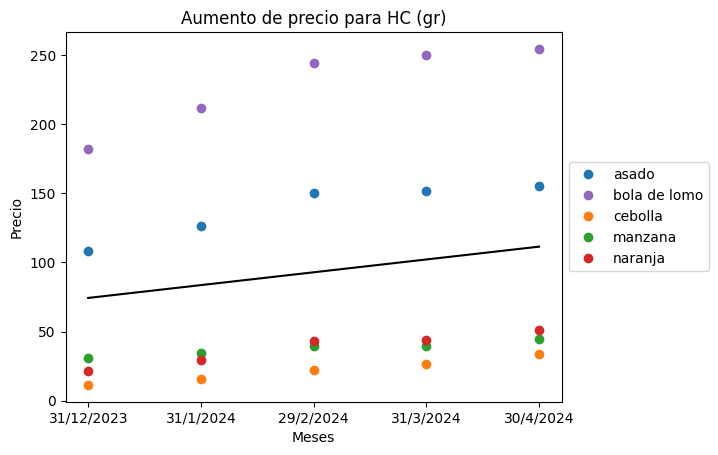

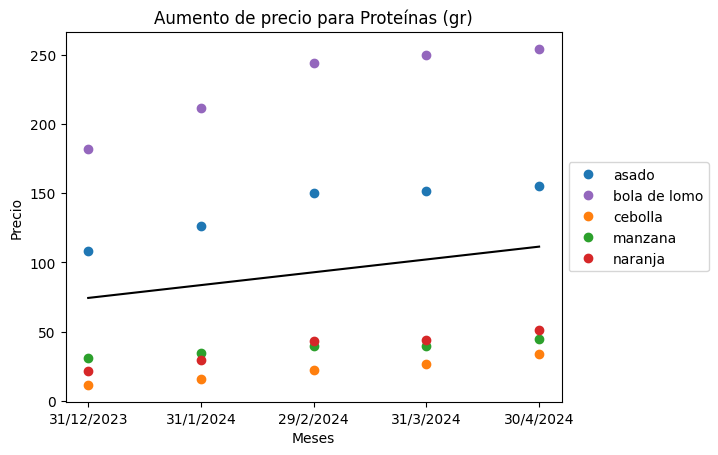

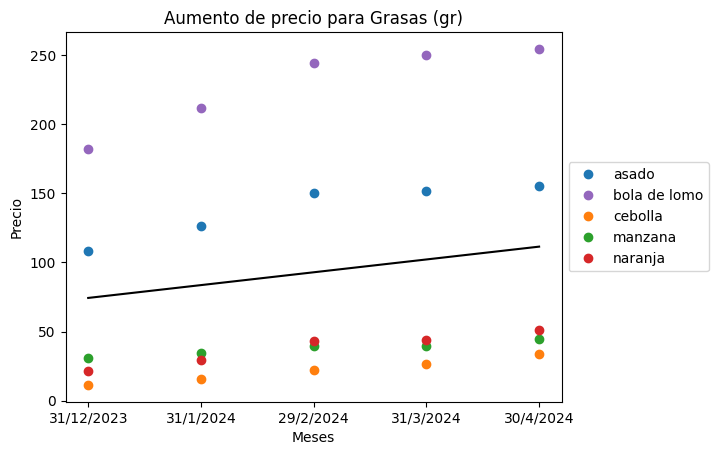

        Nutriente   Aumento
0         HC (gr)  9.276669
1  Proteínas (gr)  9.276669
2     Grasas (gr)  9.276669


In [ ]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# tomo las ultimas 4 columnas de archivo...los meses a evaluar
fechas = consumidores.columns[-5:]

#vuelvo a pasar los alimentos a munisculas
tabla_nutricional['Alimento'] = tabla_nutricional['Alimento'].str.lower()
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# crreo una lista para almacenar los aumentos
aumentos = []

colores = {}
for i, alimento in enumerate(alimentos_comunes):
    colores[alimento] = plt.cm.tab10(i)

# voy iterando por cada nutriente y los almaceno en su respectiva lista
for nutriente in ['HC (gr)', 'Proteínas (gr)', 'Grasas (gr)']:
    precios_nutriente = []
    nombres_alimentos = []
    colores_alimentos = []

    # itero sobre cada fila de la tabla_nutrional y busco el precio correspondiente a cada alimento
    for index, row in tabla_nutricional.iterrows():
        alimento = row['Alimento']
        cantidad = row['Cantidad (gr/ml)']
        
        precio_fila = consumidores[consumidores['PRODUCTOS'] == alimento][fechas]
        
        if precio_fila.empty:
            continue
        
        # calculo el precio y lo pongo en su lista
        precio_nutriente = precio_fila.iloc[0] / cantidad
        precios_nutriente.append(precio_nutriente.values)
        
        # agrego el nombre del alimento y su color correspondiente a las listas
        nombres_alimentos.append(alimento)
        colores_alimentos.append(colores[alimento])
    
    # convierto la lista en un DataFrame
    precios_nutriente = pd.DataFrame(precios_nutriente)
    
    if precios_nutriente.empty:
        continue

    # ajusto un modelo de regresión lineal
    X = np.arange(5).reshape(-1, 1)
    y = precios_nutriente.mean(axis=0)
    model = LinearRegression().fit(X, y)
    
    # busco la pendinete de la recta
    aumento = model.coef_[0]
    aumentos.append((nutriente, aumento))
    
    # grafico los puntos y la recta de regresión
    plt.figure()
    for i in range(precios_nutriente.shape[0]):
        plt.plot(fechas, precios_nutriente.iloc[i], 'o', color=colores_alimentos[i], label=nombres_alimentos[i])
    plt.plot(fechas, model.predict(X), '-', color='black')
    plt.title(f'Aumento de precio para {nutriente}')
    plt.xlabel('Meses')
    plt.ylabel('Precio')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# creo una tabla de aumentos
tabla_aumentos = pd.DataFrame(aumentos, columns=['Nutriente', 'Aumento'])
print(tabla_aumentos)


# Consigna 6
Comparar el aumento de la carne en comparacíon con los otros rubros. Si la gente consume ese porcentaje menos de carne, como queda la ingesta individual con respecto a la tabla de metas de la OMS?

In [ ]:
consumidores
#veo la tabla completa y me fijo a mano para agrupar por ¿rubros?
#agrupo en vez de solo carne...meto a las proteinas todas juntas y asi con los demas alimentos.

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,aceite cocinero girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,arroz grano fino,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,azucar ledesma,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,fideos guiseros,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,harina de trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,huevos color docena,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,pan fresco,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,leche c/vit.fort,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,yerba taragui,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,zanahorias,1000,820.0,990.0,1100.0,1100.0,1100.0


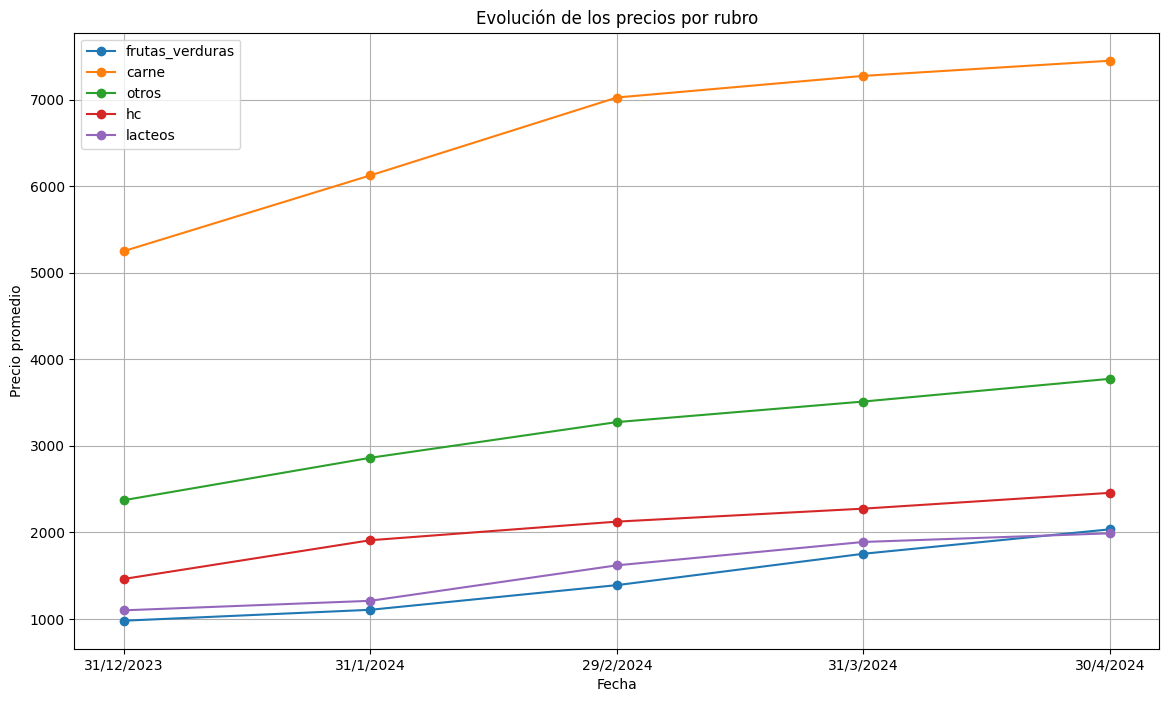

             Rubro  Aumento (%)
0  frutas_verduras   107.780612
1            carne    41.904762
2            otros    59.114858
3               hc    68.034188
4          lacteos    80.909091


In [ ]:
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

#vuelvo a pasar los alimentos a munisculas
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# defino los rubros de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'bola de lomo', 'carne picada comun'],
    'otros': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol'],
    'hc': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'lacteos': ['leche c/vit.fort']
}

# filtro los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores[consumidores['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

# tomo las ultimas 4 columnas de archivo...los meses a evaluar
fechas = consumidores.columns[-5:]

# creo un DataFrame para los precios a lo largo del tiempo
precios_tiempo = consumidores_filtrado.set_index('PRODUCTOS')[fechas].T

# calculo el aumento promedio para cada rubro y preparar los datos para graficar
aumentos_promedio = {}
datos_para_graficar = {}

for nombre, productos in grupos_alimentos.items():
    # filtro precios de los productos del grupo
    datos = precios_tiempo[productos].mean(axis=1)
    datos_para_graficar[nombre] = datos  # es el promedio de precios por fecha
    
    # calculo el aumento promedio de precios del grupo
    precio_inicial = datos[0]
    precio_final = datos[-1]
    aumento_promedio = ((precio_final - precio_inicial) / precio_inicial) * 100
    aumentos_promedio[nombre] = aumento_promedio

# creo el gráfico
plt.figure(figsize=(14, 8))

for nombre, datos in datos_para_graficar.items():
    plt.plot(fechas, datos, marker='o', linestyle='-', label=nombre)

plt.title('Evolución de los precios por rubro')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio')
plt.legend()
plt.grid(True)
plt.show()

# me armo una tabla con los porcentajes de aumento
aumentos_df = pd.DataFrame(list(aumentos_promedio.items()), columns=['Rubro', 'Aumento (%)'])
print(aumentos_df)


Para aclarar, en precios_tiempo pivoteamos la tabla consumidores libres después de filtrar por los que están en cada grupo, para que nos queden en las columnas los alimentos y así facilitar el cálculo de los promedios:

In [ ]:
precios_tiempo.head()

PRODUCTOS,aceite cocinero girasol,arroz grano fino,azucar ledesma,fideos guiseros,harina de trigo,huevos color docena,pan fresco,leche c/vit.fort,yerba taragui,zanahorias,...,tomate perita,cebolla,papa negra,acelga paquete,naranja,manzana,bola de lomo,asado,paleta,carne picada comun
31/12/2023,2500.0,1650.0,1990.0,1600.0,950.0,2200.0,1650.0,1100.0,2800.0,820.0,...,1200.0,500.0,850.0,450.0,920.0,1900.0,6200.0,5400.0,5200.0,4200.0
31/1/2024,3100.0,2300.0,2050.0,1990.0,1250.0,2600.0,2100.0,1210.0,3700.0,990.0,...,1100.0,700.0,890.0,620.0,1250.0,2100.0,7200.0,6300.0,6200.0,4800.0
29/2/2024,3450.0,2800.0,2050.0,2150.0,1350.0,3000.0,2200.0,1620.0,4600.0,1100.0,...,1200.0,990.0,1000.0,1100.0,1850.0,2400.0,8300.0,7500.0,7100.0,5200.0
31/3/2024,3600.0,3100.0,2100.0,2200.0,1500.0,3400.0,2300.0,1890.0,4950.0,1100.0,...,2300.0,1150.0,990.0,1990.0,1900.0,2400.0,8500.0,7600.0,7800.0,5200.0
30/4/2024,3700.0,3550.0,2100.0,2290.0,1690.0,3800.0,2300.0,1990.0,5500.0,1100.0,...,2700.0,1500.0,900.0,1990.0,2200.0,2700.0,8650.0,7750.0,7900.0,5500.0


In [ ]:
#Calculo cuanta carte consume una persona segun la CBA sumando las cantidades de las 4 carnes que estan en ambos archivos:
carnes = ['Asado', 'Bola de Lomo', 'Paleta ', 'Carne picada'] #agrupo las 4 carnes
carnes_data = tabla_nutricional_clean[tabla_nutricional_clean['Alimento'].isin(carnes)] #filtro en el dataset para buscar esas 4 filas

total_nutrientes = carnes_data.sum(numeric_only=True) #sumo las cantidades y los nutrientes
print(total_nutrientes)

Cantidad (gr/ml)        126.00000
HC (gr)                   0.00000
Proteinas (gr)           24.91000
Grasas (gr)              12.18000
Azucares Libres (gr)      0.00000
AGS (gr)                  7.38000
AGNI (gr)                 8.22000
AG p (gr)                 0.47500
Fibra (gr)                0.00000
Na (gr)                   0.08214
Ca (gr)                   0.01356
Fe (gr)                   0.00324
dtype: float64


Si una persona consume 126g de carne, la reducción del 42% en el consumo de carne será:

Consumo inicial= 126g

Reducción en el consumo = 126g x 0.42 = 53g

Nuevo consumo de carne = 126g - 53g = 73g

Usamos los siguientes valores nutricionales aproximados por 126g de carne:

Proteínas: 25g

Grasas totales: 12g

Para 73g de carne, la ingesta de nutrientes sería:

Proteinas = 25g x 0.73 = 18.25g
Grasas totales = 12g x 0.73 = 8.76g


Vamos a comparar estos valores con las recomendaciones de la OMS para una dieta de 2000 kcal:

Proteínas: 10-15% de la energía total (200-300 kcal)
Grasas totales: 15-30% de la energía total (300-600 kcal)

Proteínas:
Energia de proteinas = 18.25g × 4kcal/g = 73kcal

Porcentaje de energia=(73kcal / 2000kcal) × 100 = 3.65%

Grasas totales:
Energiaa de grasas = 8.76g × 9kcal/g = 78.84kcal

Porcentaje de energia = (78.84kcal / 2000kcal) × 100 = 3.9%

Comparando estos valores con las metas de la OMS, observamos lo siguiente:

Proteínas: La ingesta de proteínas disminuyó a 3.65% de la energía total, que es significativamente menor que el 10-15% recomendado por la OMS. Esto nos dice que la dieta sería deficiente en proteínas.
Grasas totales: La ingesta de grasas totales disminuye a 3.9% de la energía total, muy por debajo del 15-30% recomendado por la OMS. Esto indica que la dieta también sería deficiente en grasas.

Conclusión
Si la gente consume un 42% menos de carne debido al aumento del precio, la ingesta de proteínas y grasas totales disminuirá significativamente, quedando por debajo de las recomendaciones de la OMS para una dieta equilibrada. Por lo tanto, sería necesario buscar fuentes alternativas de proteínas y grasas para cumplir con las metas de ingesta de nutrientes para una alimentación saludable según la OMS.

In [ ]:
import pandas as pd

# Leer el archivo CSV de consumidores_libres
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# Convertir los nombres de los alimentos a minúsculas para facilitar la comparación
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# Definir los grupos de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'bola de lomo', 'carne picada comun'],
    'otros': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol'],
    'hc': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'lacteos': ['leche c/vit.fort']
}

# Filtrar los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores[consumidores['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]


# Crear DataFrame
consumidores_con_aumentos = pd.DataFrame(consumidores_filtrado)

# Calcular el porcentaje de aumento
consumidores_con_aumentos["Aumento (%)"] = ((consumidores["30/4/2024"] - consumidores["31/12/2023"]) / consumidores["31/12/2023"]) * 100

# Mostrar los resultados
print("Aumentos por producto")
consumidores_con_aumentos



Aumentos por producto


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Aumento (%)
0,aceite cocinero girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0,48.000000
1,arroz grano fino,1000,1650.0,2300.0,2800.0,3100.0,3550.0,115.151515
2,azucar ledesma,1000,1990.0,2050.0,2050.0,2100.0,2100.0,5.527638
3,fideos guiseros,500,1600.0,1990.0,2150.0,2200.0,2290.0,43.125000
4,harina de trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0,77.894737
5,huevos color docena,720,2200.0,2600.0,3000.0,3400.0,3800.0,72.727273
6,pan fresco,1000,1650.0,2100.0,2200.0,2300.0,2300.0,39.393939
7,leche c/vit.fort,1000,1100.0,1210.0,1620.0,1890.0,1990.0,80.909091
8,yerba taragui,1000,2800.0,3700.0,4600.0,4950.0,5500.0,96.428571
9,zanahorias,1000,820.0,990.0,1100.0,1100.0,1100.0,34.146341


# grafico extra falopa

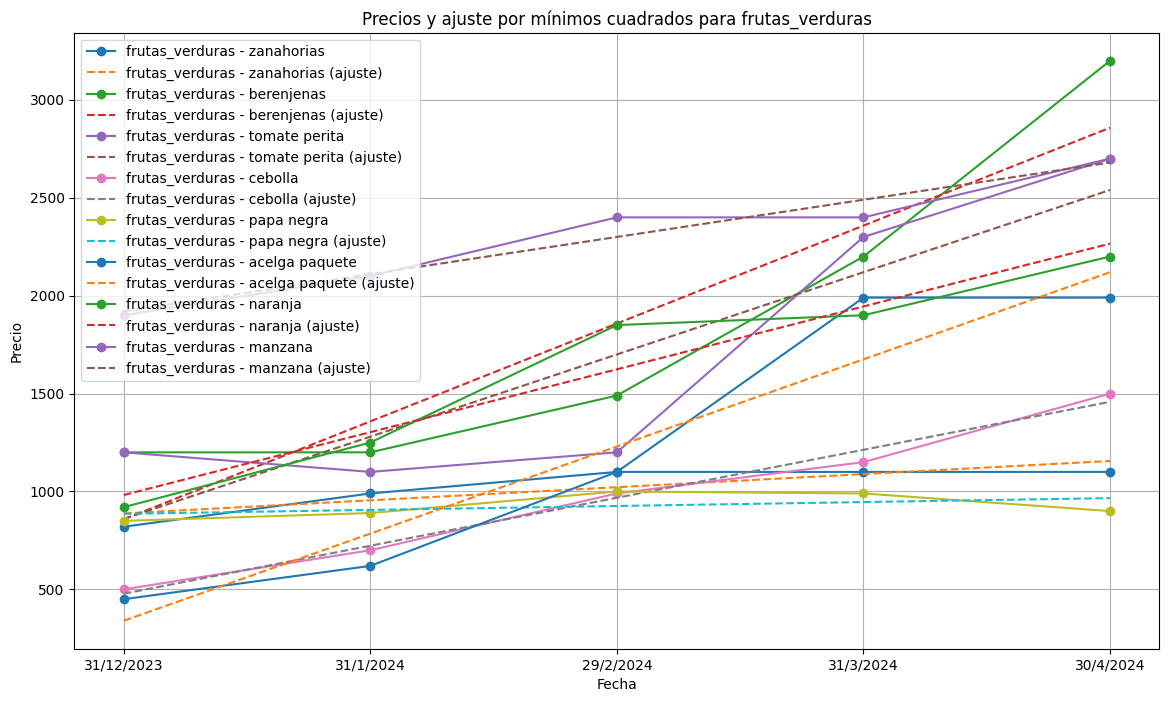

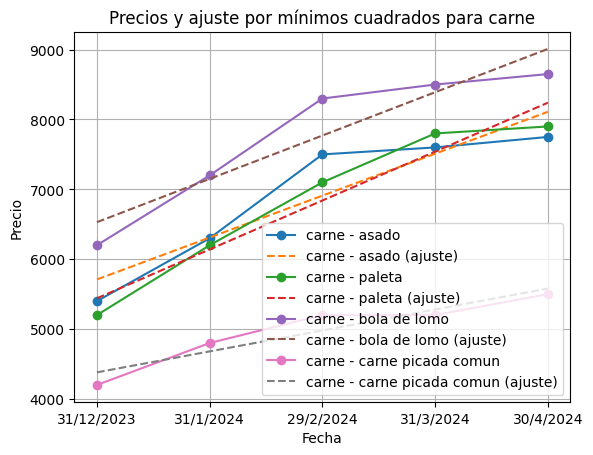

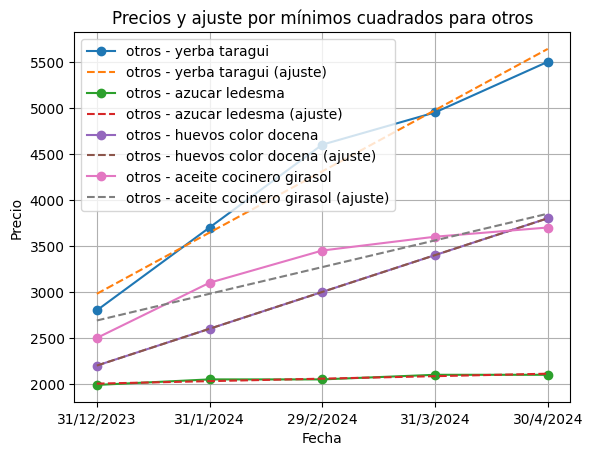

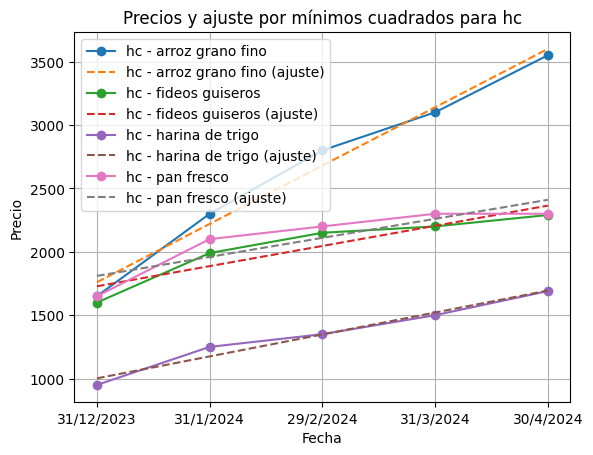

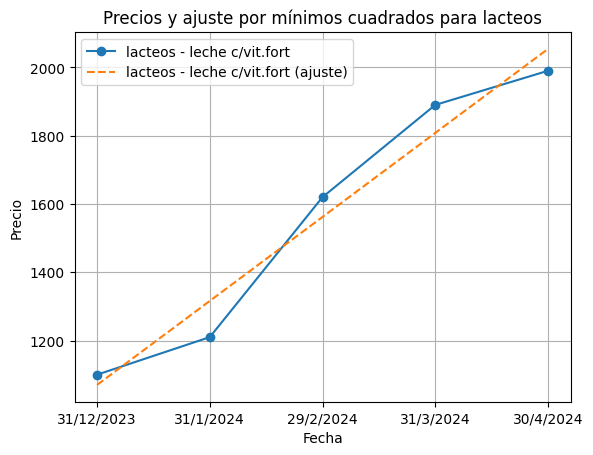

In [ ]:
# Leer el archivo CSV de consumidores_libres
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# Convertir los nombres de los alimentos a minúsculas para facilitar la comparación
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# Definir los grupos de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'bola de lomo', 'carne picada comun'],
    'otros': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol'],
    'hc': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'lacteos': ['leche c/vit.fort']
}

# Filtrar los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores[consumidores['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

# Calcular el porcentaje de aumento para cada producto
consumidores_filtrado['Aumento (%)'] = ((consumidores_filtrado['30/4/2024'] - consumidores_filtrado['31/12/2023']) / consumidores_filtrado['31/12/2023']) * 100

# Fechas para el gráfico
fechas = consumidores.columns[-5:]

# Crear un DataFrame para los precios a lo largo del tiempo
precios_tiempo = consumidores_filtrado.set_index('PRODUCTOS')[fechas].T

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Función para ajustar y graficar una regresión lineal
def ajustar_y_graficar(datos, nombre):
    X = np.arange(5).reshape(-1, 1)  # Variables independientes (índices de tiempo)
    for producto in datos.columns:
        y = datos[producto].values.reshape(-1, 1)  # Variable dependiente (precios)
        modelo = LinearRegression().fit(X, y)  # Ajustar el modelo
        y_pred = modelo.predict(X)  # Predicciones
        
        plt.plot(fechas, y, marker='o', linestyle='-', label=f'{nombre} - {producto}')
        plt.plot(fechas, y_pred, linestyle='--', label=f'{nombre} - {producto} (ajuste)')
    
    plt.title(f'Precios y ajuste por mínimos cuadrados para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar la función a cada grupo de alimentos
for nombre, productos in grupos_alimentos.items():
    datos = precios_tiempo[productos]
    ajustar_y_graficar(datos, nombre)


este ultimo es un grafico extra que me parecia llamativo...miralo jajaja yo se que te gustan los graficos asi JAJAJAJAJA ;)

Consigna 7.- Proponer dos alimentos de la tabla 3 que lleguen a reemplazar la
disminuci´on del 18.5 % de la carne sin perder valor nutricional. Corroborar con
la tabla de metas de la OMS la dieta diaria obtenida. Adem´as, se pone como
restricci´on en la elecci´on, que el precio de los alimentos de reemplazo debe ser
menor al 50 % del aumento de la carne

In [ ]:

carnes = ['Asado', 'Bola de Lomo', 'Paleta ', 'Carne picada'] #agrupo las 4 carnes
carnes_data = tabla_nutricional_clean[tabla_nutricional_clean['Alimento'].isin(carnes)] #filtro en el dataset para buscar esas 4 filas

total_nutrientes = carnes_data.sum(numeric_only=True) #sumo las cantidades y los nutrientes
print(total_nutrientes)


Cantidad (gr/ml)        126.00000
HC (gr)                   0.00000
Proteinas (gr)           24.91000
Grasas (gr)              12.18000
Azucares Libres (gr)      0.00000
AGS (gr)                  7.38000
AGNI (gr)                 8.22000
AG p (gr)                 0.47500
Fibra (gr)                0.00000
Na (gr)                   0.08214
Ca (gr)                   0.01356
Fe (gr)                   0.00324
dtype: float64


In [ ]:
new_row = {'Alimento': 'carnes'} #creo la nueva fila 
for col in total_nutrientes.index:
    new_row[col] = total_nutrientes[col]

tabla_nutricional_carnes = tabla_nutricional_clean.append(new_row, ignore_index=True) #agrego la nueva fila "carnes" al dataframe
tabla_nutricional_carnes.tail()

/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91158/3388307816.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla_nutricional_carnes = tabla_nutricional_clean.append(new_row, ignore_index=True) #agrego la nueva fila "carnes" al dataframe


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
53,Sal fina,5.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,2.00000,0.00000,0.00000
54,Vinagre,3.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,0.00000,0.00000,0.00000
55,Cafe,1.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,0.00000,0.00000,0.00000
56,Yerba,20.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,0.00000,0.00000,0.00000
57,carnes,126.0,0.0,24.91,12.18,0.0,7.38,8.22,0.475,0.0,0.08214,0.01356,0.00324


In [ ]:
#busco cuales serian los valores nutricionales de ese 18,5% 

# Calculate 18.5% of the 'carnes' row
carnes_row = tabla_nutricional_carnes[tabla_nutricional_carnes['Alimento'] == 'carnes'] #calculo el 18,5% de la fila
carnes_18_5 = carnes_row.iloc[:, 1:] * 0.185


print(carnes_18_5.T)
#me quedo el indile de la fila (57) ahi arriba

                             57
Cantidad (gr/ml)      23.310000
HC (gr)                0.000000
Proteinas (gr)         4.608350
Grasas (gr)            2.253300
Azucares Libres (gr)   0.000000
AGS (gr)               1.365300
AGNI (gr)              1.520700
AG p (gr)              0.087875
Fibra (gr)             0.000000
Na (gr)                0.015196
Ca (gr)                0.002509
Fe (gr)                0.000599


In [ ]:
carnes_consumidores = ['asado', 'paleta', 'bola de lomo', 'carne picada comun'] #agrupo las 4 carnes
precios_carne = consumidores[consumidores['PRODUCTOS'].isin(carnes_consumidores)] #filtro en el dataset para buscar esas 4 filas
precio = precios_carne.sum(numeric_only=True) #sumo las cantidades y los precios
print(precio)


Cantidad       4000.0
31/12/2023    21000.0
31/1/2024     24500.0
29/2/2024     28100.0
31/3/2024     29100.0
30/4/2024     29800.0
dtype: float64


asumo que los alimentos se van a comparar en MAYO y tomo los precios de abril para ver que aliemntos debo comprar para reemplazar a la carne